<a href="https://colab.research.google.com/github/ashlahafifi/AshlahA/blob/main/Muhammad%20Ashlah%20Afifi_1103210216_UAS%20Machine%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Muhammad Ashlah Afifi

NIM: 1103210216

Kelas: TK-45-04

Link GPT: https://chatgpt.com/share/a0a49300-b566-400d-9fd3-a5848887e4ee


#Import Library yang akan digunakan

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define the class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


#Menampilkan Gambar

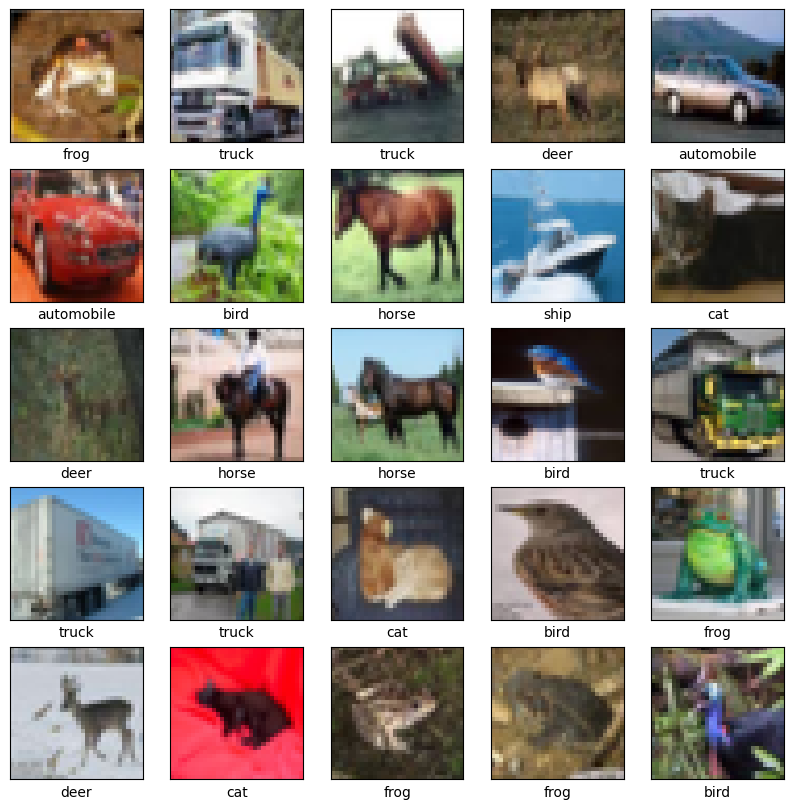

In [5]:
def display_sample_images(images, labels, class_names, num_images=25):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i])
        plt.xlabel(class_names[labels[i][0]])
    plt.show()

# Displays the first 25 images of the training dataset
display_sample_images(train_images, train_labels, class_names)


#Compile Model

In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [8]:
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    rotation_range=10,
    zoom_range=0.1
)

datagen.fit(train_images)


#Train Model

In [11]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 [==============================] - 240s 154ms/step - loss: 1.2963 - accuracy: 0.0985 - val_loss: 1.0774 - val_accuracy: 0.0811
Epoch 2/10
1563/1563 [==============================] - 227s 145ms/step - loss: 1.1323 - accuracy: 0.0997 - val_loss: 1.1705 - val_accuracy: 0.0296
Epoch 3/10
1563/1563 [==============================] - 217s 139ms/step - loss: 1.0406 - accuracy: 0.1008 - val_loss: 0.9993 - val_accuracy: 0.1127
Epoch 4/10
1563/1563 [==============================] - 217s 139ms/step - loss: 0.9872 - accuracy: 0.1006 - val_loss: 1.2164 - val_accuracy: 0.1307
Epoch 5/10
1563/1563 [==============================] - 226s 145ms/step - loss: 0.9405 - accuracy: 0.1000 - val_loss: 0.8136 - val_accuracy: 0.0998
Epoch 6/10
1563/1563 [==============================] - 213s 136ms/step - loss: 0.8997 - accuracy: 0.1006 - val_loss: 0.9114 - val_accuracy: 0.0695
Epoch 7/10
1563/1563 [==============================] - 214s 137ms/step - loss: 0.8702 - accuracy: 0.1008 - val_

#Prediksi pada Dataset

In [10]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)


313/313 [==============================] - 13s 41ms/step


#Evaluasi Model

In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 11s - loss: 0.7502 - accuracy: 0.0921 - 11s/epoch - 36ms/step

Test accuracy: 0.09210000187158585


#Memvisualisasikan Gambar dengan Prediksi

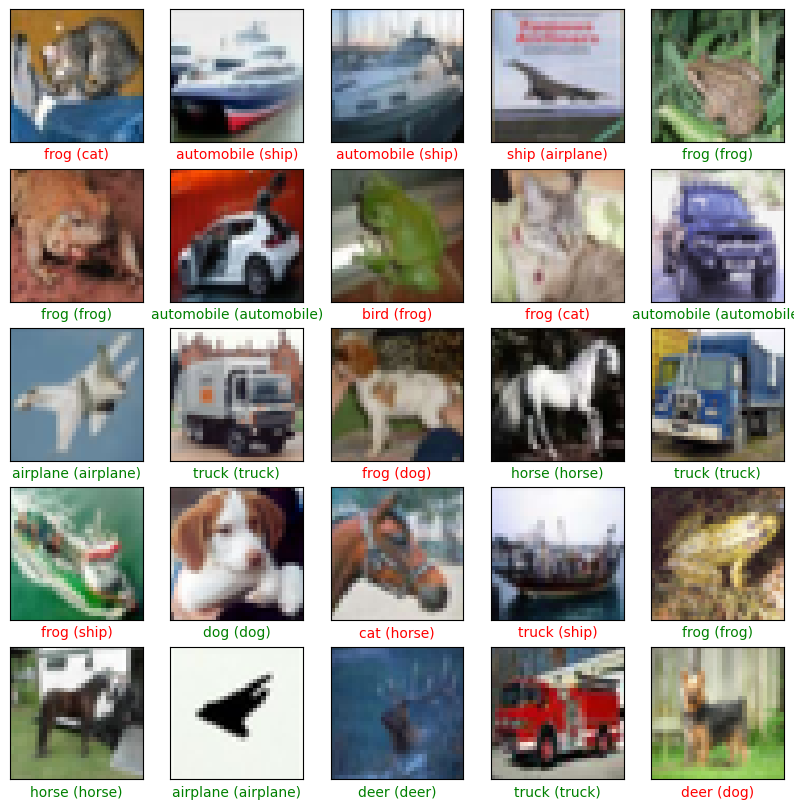

In [13]:
def plot_image_predictions(images, labels, predictions, class_names, num_images=25):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i])
        predicted_label = np.argmax(predictions[i])
        true_label = labels[i][0]
        color = 'green' if predicted_label == true_label else 'red'
        plt.xlabel(f"{class_names[predicted_label]} ({class_names[true_label]})", color=color)
    plt.show()

plot_image_predictions(test_images, test_labels, predictions, class_names)

#Plot Akurasi dan Loss Pelatihan serta Validasi

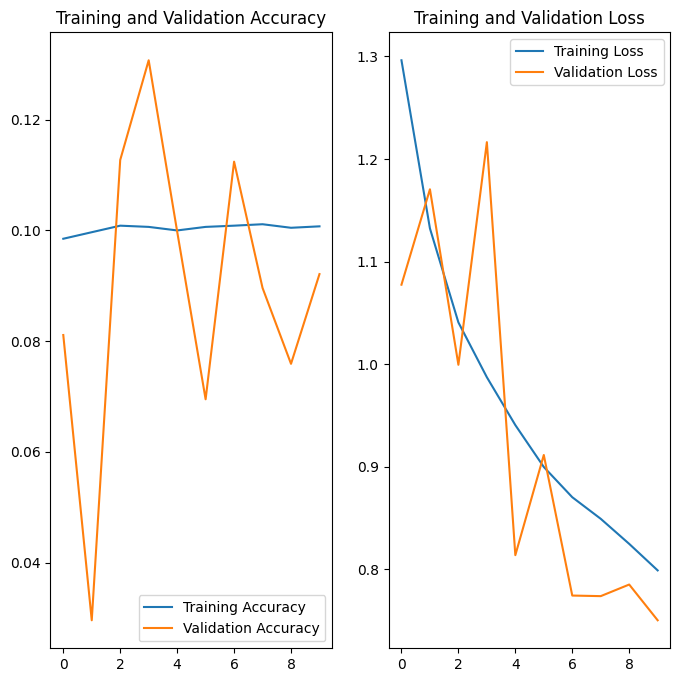

In [15]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()